In [3]:
import numpy as np

def convert_fasor_to_rectangular(magnitude, phase):
    import math
    real = magnitude * math.cos(phase)
    imaginary = magnitude * math.sin(phase)
    return real+imaginary*1j

In [186]:
# Impedancias

z = 86.44
theta = 11.5*np.pi/180

zbn = zcn = convert_fasor_to_rectangular(z, theta)
zan = convert_fasor_to_rectangular(z/10, theta)

# Crear la matriz de impedancias
A = np.array([[zan+zbn, -zbn], [-zbn, zbn+zcn]])
print("Matriz de impedancias:\n", A)

# Calcular la inversa de la matriz
A_inv = np.linalg.inv(A)

# Crear el vector de tensiones (corregido)
V = np.array([convert_fasor_to_rectangular(208, 30*np.pi/180), convert_fasor_to_rectangular(208, -90*np.pi/180)])
print("Vector de tensiones:\n", V.transpose())
# Calcular las corrientes
I = np.dot(A_inv, V)

print("Corrientes:")
print(I)

# Calcular las corrientes en coordenadas polares
I_magnitudes = np.abs(I)
I_phases = np.angle(I)

print("Corrientes en coordenadas polares:")
print(I_magnitudes)
print(I_phases*180/np.pi)

I1 = I[0]
I2 = I[1]-I[0]
I3 = -I[1]

print("Corrientes de fase:")
print(np.abs(I1), np.angle(I1)*180/np.pi)
print(np.abs(I2), np.angle(I2)*180/np.pi)
print(np.abs(I3), np.angle(I3)*180/np.pi)

Matriz de impedancias:
 [[ 93.17516061+18.95670068j -84.70469147-17.23336425j]
 [-84.70469147-17.23336425j 169.40938293+34.4667285j ]]
Vector de tensiones:
 [1.80133284e+02+104.j 1.27363267e-14-208.j]
Corrientes:
[3.40346011-0.69244179j 1.46186118-1.52521406j]
Corrientes en coordenadas polares:
[3.47318533 2.11265616]
[-11.5        -46.21500395]
Corrientes de fase:
3.4731853306178326 -11.5
2.1126561589863586 -156.7849960460518
2.1126561589863586 133.7849960460518


Valores límite:
I: 1.389274132247133 -11.500000000000002
V: 120.08885599144217 -3.390081418182066e-15


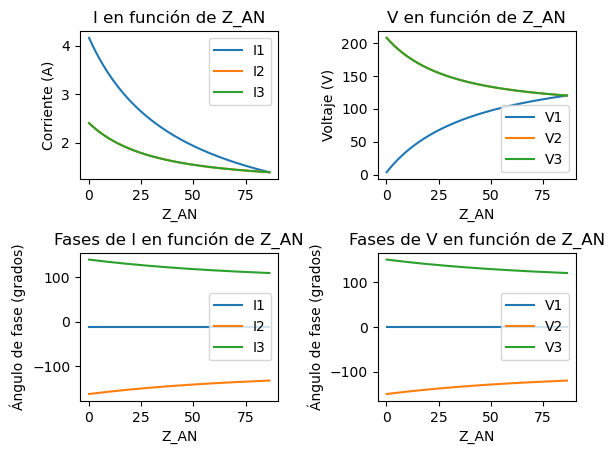

In [187]:
# Hacer el ejercicio para valores de zan entre 1 y 100 % de zbn
z_vect = z*np.linspace(0.001, 1, 1000)
zan = convert_fasor_to_rectangular(z, theta)
zan_vect = zan*np.linspace(0.01, 1, 1000)
I = np.zeros((1000, 2), dtype=complex)

for i in range(1000):
    zan = convert_fasor_to_rectangular(z_vect[i], theta)
    A = np.array([[zan+zbn, -zbn], [-zbn, zbn+zcn]])
    A_inv = np.linalg.inv(A)
    I[i] = np.dot(A_inv, V)

# Calcular las corrientes de fase
I1 = I[:, 0]
I2 = I[:, 1]-I[:, 0]
I3 = -I[:, 1]

# Calcular los voltajes de fase
V1 = I1*zan_vect
V2 = I2*zbn
V3 = I3*zcn

# Graficar en un arreglo 2x2 las magnitudes de las corrientes y los voltajes de fase y sus ángulos
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(z_vect, np.abs(I1), label='I1')
axs[0, 0].plot(z_vect, np.abs(I2), label='I2')
axs[0, 0].plot(z_vect, np.abs(I3), label='I3')
axs[0, 0].set_xlabel('Z_AN')
axs[0, 0].set_ylabel('Corriente (A)')
axs[0, 0].set_title('I en función de Z_AN')
axs[0, 0].legend()

axs[0, 1].plot(z_vect, np.abs(V1), label='V1')
axs[0, 1].plot(z_vect, np.abs(V2), label='V2')
axs[0, 1].plot(z_vect, np.abs(V3), label='V3')
axs[0, 1].set_xlabel('Z_AN')
axs[0, 1].set_ylabel('Voltaje (V)')
axs[0, 1].set_title('V en función de Z_AN')
axs[0, 1].legend()

axs[1, 0].plot(z_vect, np.angle(I1, deg=True), label='I1')
axs[1, 0].plot(z_vect, np.angle(I2, deg=True), label='I2')
axs[1, 0].plot(z_vect, np.angle(I3, deg=True), label='I3')
axs[1, 0].set_xlabel('Z_AN')
axs[1, 0].set_ylabel('Ángulo de fase (grados)')
axs[1, 0].set_title('Fases de I en función de Z_AN')
axs[1, 0].legend()

axs[1, 1].plot(z_vect, np.angle(V1, deg=True), label='V1')
axs[1, 1].plot(z_vect, np.angle(V2, deg=True), label='V2')
axs[1, 1].plot(z_vect, np.angle(V3, deg=True), label='V3')
axs[1, 1].set_xlabel('Z_AN')
axs[1, 1].set_ylabel('Ángulo de fase (grados)')
axs[1, 1].set_title('Fases de V en función de Z_AN')
axs[1, 1].legend()

# Agregar espacios entre los subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)


# Mostrar los valores límite (cuando el circuito está balanceado)
print("Valores límite:")
print("I:", np.abs(I1[-1]), np.angle(I1[-1], deg=True))
print("V:", np.abs(V1[-1]), np.angle(V1[-1], deg=True))


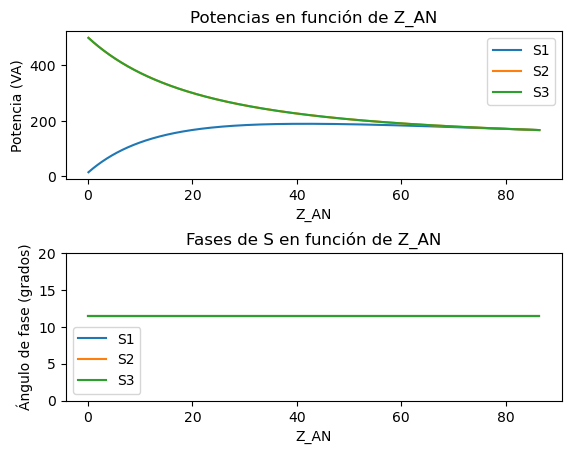

In [188]:
# Calcular las potencias por fase
S1 = V1 * np.conj(I1)
S2 = V2 * np.conj(I2)
S3 = V3 * np.conj(I3)

# Graficar las magnitudes y ángulos de las potencias por fase
fig, axs = plt.subplots(2, 1)
axs[0].plot(z_vect, np.abs(S1), label='S1')
axs[0].plot(z_vect, np.abs(S2), label='S2')
axs[0].plot(z_vect, np.abs(S3), label='S3')
axs[0].set_xlabel('Z_AN')
axs[0].set_ylabel('Potencia (VA)')
axs[0].set_title('Potencias en función de Z_AN')
axs[0].legend()

axs[1].plot(z_vect, np.angle(S1, deg=True), label='S1')
axs[1].plot(z_vect, np.angle(S1, deg=True),  label='S2')
axs[1].plot(z_vect, np.angle(S1, deg=True), label='S3')
axs[1].set_xlabel('Z_AN')
axs[1].set_ylabel('Ángulo de fase (grados)')
axs[1].set_title('Fases de S en función de Z_AN')
axs[1].legend()

# Ajustar el eje y
axs[1].set_ylim(0, 20)

# Agregar espacios entre los subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)


## Porcentaje de potencia perdido en las líneas

In [37]:
z = 86.44*3
theta = 11.5*np.pi/180

zab = convert_fasor_to_rectangular(z, theta)
zbc = convert_fasor_to_rectangular(z, theta)
zac = convert_fasor_to_rectangular(z, theta)
zl = 0.266
zl = convert_fasor_to_rectangular(zl, 0)

A = [[zab+2*zl, -zab, -zl], [-zab, zab+zbc+zac, -zbc], [-zl, -zbc, zbc+2*zl]]

A_inv = np.linalg.inv(A)

V = [convert_fasor_to_rectangular(208, 30*np.pi/180), 0, convert_fasor_to_rectangular(208, -90*np.pi/180)]

I = np.dot(A_inv, V)

print("Corrientes:")
print([[np.abs(i), np.angle(i, deg=True)] for i in I])

I1 = I[0]
I2 = I[2]-I[0]
I3 = -I[2]

print("Corrientes de fase:")
print(np.abs(I1), np.angle(I1)*180/np.pi)
print(np.abs(I2), np.angle(I2)*180/np.pi)
print(np.abs(I3), np.angle(I3)*180/np.pi)

Corrientes:
[[1.385097109598257, -11.464954107794021], [0.7996861890803263, -41.464954107794014], [1.385097109598257, -71.464954107794]]
Corrientes de fase:
1.385097109598257 -11.46495410779402
1.3850971095982563 -131.46495410779403
1.385097109598257 108.535045892206


In [39]:
print("Voltajes en cada resistenca:")
Vl1 = I1*zl
Vl2 = I3*zl
Vl3 = I3*(-1*zl)

print(np.abs(Vl1), np.angle(Vl1, deg=True))
print(np.abs(Vl2), np.angle(Vl2, deg=True))
print(np.abs(Vl3), np.angle(Vl3, deg=True))

print("Potencia en cada resistencia:")
S1 = Vl1*np.conj(I1)
S2 = Vl2*np.conj(I3)
S3 = Vl3*np.conj(-I3)
print(S1, S2, S3)

print("Potencia por línea:")
vac = -V[0]-V[2]
Sab = V[0]*np.conj(I1)
Sbc = V[2]*np.conj(I3)
Sac = vac*np.conj(-I3)
print(V[0]+V[2]+vac)
print(Sab, Sbc, Sac)

print("Porción de potencia perdida en cada resistencia de línea:")
print(f"{round(np.abs(S1)/np.abs(Sab)*100, 2)}%, {round(np.abs(S2)/np.abs(Sbc)*100, 2)}%, {round(np.abs(S3)/np.abs(Sac)*100, 2)}%")

print("Porción de potencia activa perdida en cada resistencia de línea:")
print(f"{round(np.abs(S1)/np.real(Sab)*100, 2)}%, {round(np.abs(S2)/np.real(Sbc)*100, 2)}%, {round(np.abs(S3)/np.real(Sac)*100, 2)}%")


Voltajes en cada resistenca:
0.3684358311531364 -11.464954107794021
0.36843583115313633 108.53504589220601
0.36843583115313633 -71.464954107794
Potencia en cada resistencia:
(0.5103194048026406-1.3877787807814457e-17j) (0.5103194048026406+0j) (0.5103194048026406+0j)
Potencia por línea:
0j
(215.89101934836611+190.76895007120578j) (-273.1562666891324+91.582632169j) (-215.89101934836617-190.7689500712057j)
Porción de potencia perdida en cada resistencia de línea:
0.18%, 0.18%, 0.18%
Porción de potencia activa perdida en cada resistencia de línea:
0.24%, -0.19%, -0.24%


## Circuitos RC y RL

In [27]:

import numpy as np 

t = np.linspace(0, 0.001, 10)

R1 = 100
R2 = 100
R3 = 2200
R4 = 1000

Req = (R1*R2)/(R1+R2) + R3 + R4

L = 0.1e-3
C = 0.1e-6 

tao_c = Req*C
tao_l = Req*L

v_c = 10*(1-np.exp(-t/tao_c))
i_c = 10/(R3+R4)*np.exp(-t/tao_c)

R3 = 22
R4 = 10

Req = (R1*R2)/(R1+R2) + R3 + R4

t = np.linspace(0, 1, 1000)

v_l = 10/Req*np.exp(-t/tao_l)
i_l = 10/Req*(1-np.exp(-t/tao_l))


## Gráficas

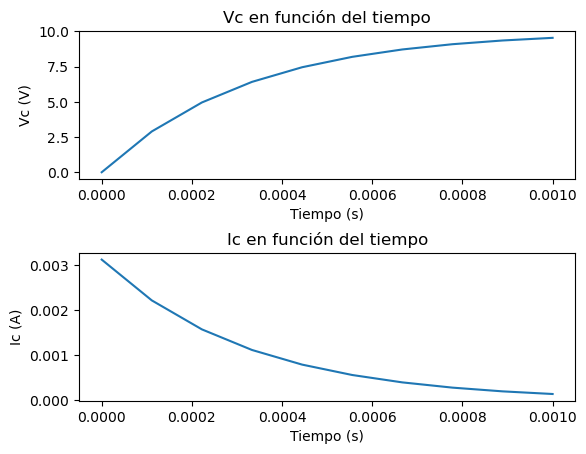

In [15]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, v_c)
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Vc (V)')
axs[0].set_title('Vc en función del tiempo')

axs[1].plot(t, i_c)
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Ic (A)')
axs[1].set_title('Ic en función del tiempo')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

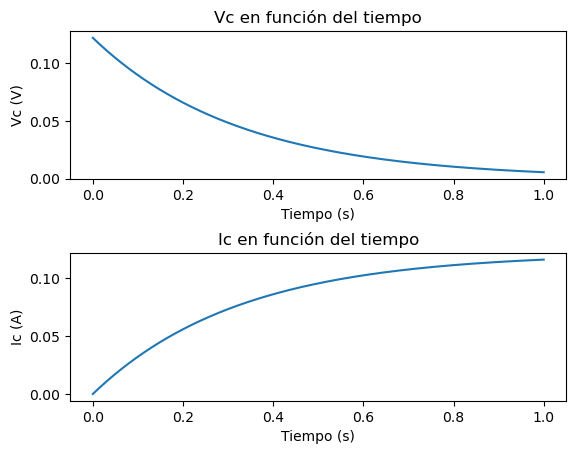

In [28]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, v_l)
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Vc (V)')
axs[0].set_title('Vc en función del tiempo')

axs[1].plot(t, i_l)
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Ic (A)')
axs[1].set_title('Ic en función del tiempo')

plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

## Circuitos RLC

w:  10000.0 a:  500.0
Sobreamortiguado


Text(0.5, 1.0, 'V en función del tiempo')

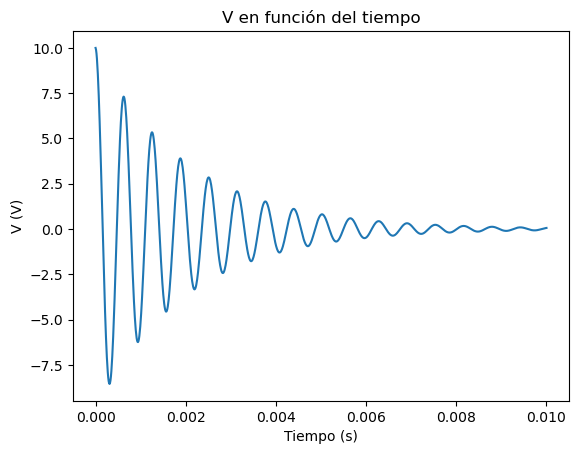

In [32]:
R = 100
L = 0.1
C = 0.1e-6

t = np.linspace(0, 0.01, 1000)

w = 1/np.sqrt(L*C)
a = R/(2*L)

v = 10*np.exp(-a*t)*np.cos(w*t)
print ('w: ', w, 'a: ', a)

if 0 < a < 1:
    print('Subamortiguado')
elif a == 1:
    print('Críticamente amortiguado')
else:
    print('Sobreamortiguado')
    
from matplotlib import pyplot as plt

plt.plot(t, v)
plt.xlabel('Tiempo (s)')
plt.ylabel('V (V)')
plt.title('V en función del tiempo')
